In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [2]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Prepare the data
The namees are not great to work with, so lets rename some of the columns. Then convert object fields to numbers as we cannot work with text . Finally, lets move Y into its own array and drop it from `df`. The result of this steep is that `df` is our feature set and only contains numbers, while `y` is our result set.

In [4]:
df.rename(columns = {" BMI " :"BMI", 
                    "Life expectancy ": "Life_expectancy",
                    "Adult Mortality":"Adult_mortality",
                    "infant deaths":"Infant_deaths",
                    "percentage expenditure":"Percentage_expenditure",
                    "Hepatitis B":"HepatitisB",
                    "Measles ":"Measles",
                    "under-five deaths ": "Under_five_deaths",
                    "Total expenditure":"Total_expenditure",
                    "Diphtheria ": "Diphtheria",
                    " thinness  1-19 years":"Thinness_1-19_years",
                    " thinness 5-9 years":"Thinness_5-9_years",
                    " HIV/AIDS":"HIV/AIDS",
                    "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

columns = ["Status","Country"]
for feature in columns:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

Y = df["Life_expectancy"]
df = df.drop(["Life_expectancy"], axis=1)    
    

# Plot correlation matrix

If we have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. Looking at the matrix, you can see 9 columns that have the highest correlation above 0.38. We are only interested in `life expectancy`, so look at the bottom row for your results.   


<AxesSubplot:>

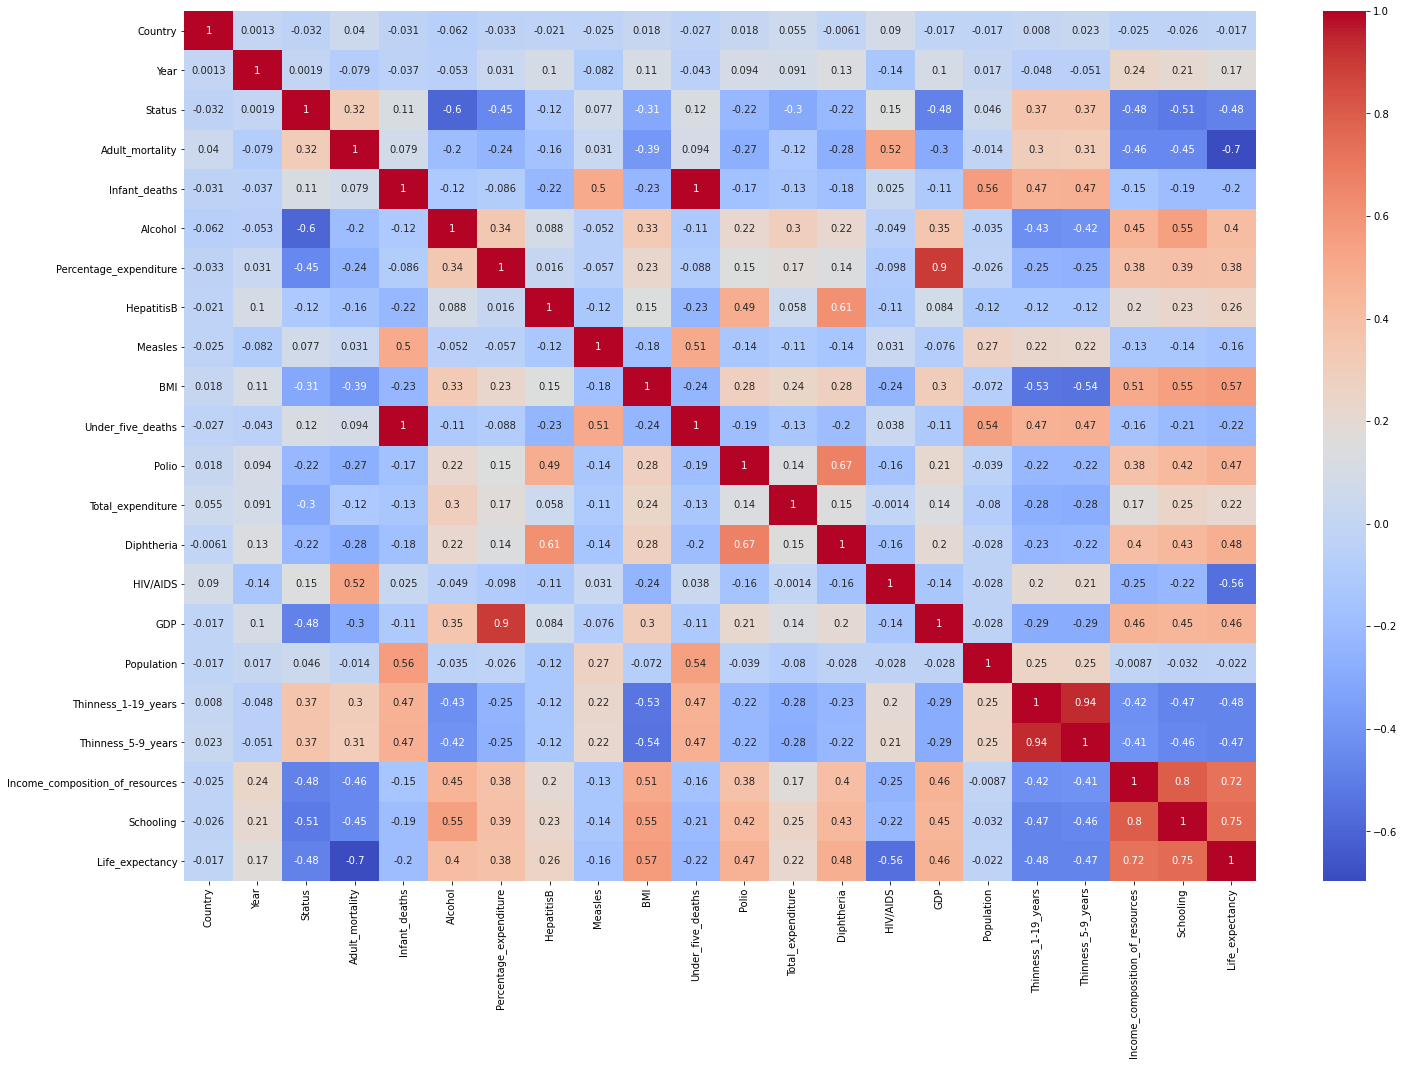

In [5]:
plt.figure(figsize = (24,16))
sns.heatmap(pd.concat([df,Y], axis=1).corr(), annot=True, cmap="coolwarm")

# Fill in missing features  

An important part of regression is understanding which features are missing. We can choose to ignore all rows with missing values, or fill them in with either mode, median or mode.

- Mode = most common value
- Median = middle value
- Mean = average

In [6]:
def fillmissing(df, feature, method):
    if method == "mode":
        df[feature] = df[feature].fillna(df[feature].mode()[0])
        
    elif method == "median":
        df[feature] = df[feature].fillna(df[feature].median())
        
    else:
        df[feature] = df[feature].fillna(df[feature].mean())

In [7]:
features_missing= df.columns[df.isna().any()]
for feature in features_missing:
    fillmissing(df, feature= feature, method= "mean")

Y.fillna(Y.median(), inplace=True)

# Get X/Y into arrays

Now copy out our X and y columns into matrix's for easier matrix manipulation later.

In [8]:
X = df.to_numpy()  # np.matrix(df.to_numpy())
y = Y.to_numpy().transpose()  # np.matrix(Y.to_numpy()).transpose()

m,n = X.shape

# Normalise X  

Now, lets normalise X so the values lie between -1 and 1. We do this so we can get all features into a similar range. We use the following equation  
$X_{(i)} = \frac{x_{(i)}-mean(x)}{max(x)-min(x)}$

In [9]:
mu = X.mean(0) # 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma
#xn2 = (X - X.mean()) / (X.max() - X.min())

Add a column of ones to X for easier matrix manipulation of our hypothesis and cost function later

In [10]:
# np.matrix(np.hstack((np.ones((m, 1)), xn)))
xo = np.hstack((np.ones((m, 1)), xn))

# Gradient descent

Create the variables we need for gradient descent. We need the following variables

- repeat = number of times to repeat gradient descent
- theta = a theta for each feature of X, add one more column for theta 0
- costhistory = keep the cost of each iteration of gradient descent

In [11]:
repeat = 1000
lrate = 0.01
theta = np.zeros((n+1))

Lets define a cost function which gradient descent will use to determine the cost of each theta. The cost function will implement the following cost equation.  
  
$J^{(i)} = (\frac{1}{2m}) \sum \limits _{j=1}(h\theta(x^{(i)}) -y^{(i)})^2$  

In [12]:
def computeCostMulti(X, y, theta):
    """Compute cost for linear regression with multiple variables
    J = computeCostMulti(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    :param X:
    :param y:
    :param theta:
    :return:
    """
    # Initialize some useful values
    m = len(y)  # number of training examples
    diff = np.matmul(X, theta) - y
    J = 1 / (2 * m) * np.matmul(diff, diff)
    return J


In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """Performs gradient descent to learn theta

    theta = gradientDescentMulti(x, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    :param X:
    :param y:
    :param theta:
    :param alpha:
    :param num_iters:
    :return:
    """
    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = []

    for i in range(num_iters):
        hc = np.matmul(X, theta) - y
        theta -= alpha / m * np.matmul(X.transpose(), hc)
        # Save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [14]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)

In [15]:
# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(f' {theta} ')

Theta computed from gradient descent: 
 [ 6.92317285e+01  2.08254054e-01 -6.05839534e-02 -5.60491465e-01
 -2.51750342e+00  2.51081235e-01  1.24711659e-01  2.20795551e-01
 -3.85876173e-01 -2.90791429e-01  9.11866572e-01 -4.98899416e-01
  7.41342976e-01  1.75493270e-01  1.10142331e+00 -2.46954747e+00
  3.45934918e-01  1.75233496e-01 -2.64504377e-01 -1.43952754e-03
  1.40944812e+00  2.11011715e+00] 


# Plot the cost of gradient descent  

Plot the cost history to ensure cost is decreasing with number of iterations. After plotting, you should see the cost decreasing with each iteration.

/var/folders/z2/6mdbpjn556s1zb_dqy_hj6lr0000gn/T/ipykernel_12473/2589352249.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(repeat), J_history, '-b', LineWidth=2)


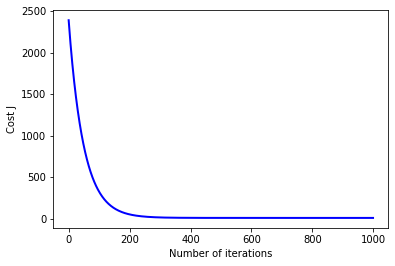

In [16]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Predict 

Let run our predition using the equation  
$y = \theta_{0} + \theta_{1}(x_{1}) + \theta_{2}(x_{2}) + \theta_{..n}(x_{..n})$  

Take note that adding a column of ones to X and then using matrix multiplication, performs above equation in one easy step.  

In [17]:
y_pred = np.matmul(xo, theta)    

# Evaluate predictions  
Lets firstly use Root Mean Squared Error (RMSE) which is the square root of the mean of the squared errors. Below is the equation applied and the result will be used later for a comparision.  
  
$rmse_{(yTrue,yPred)} = \sqrt{\sum \limits _{m=1}(yTrue - yPred)^2}$  

Lets also work out the percentage each prediction has of the true result. Then use this to find the number of predicted rows that fall within 90% to 110% of the actual rows. We will see this as being acceptable to calculate a final accuracy.  

In [18]:
# get RMSE error rate
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))

# calculate our own accuracy where prediction within 10% is ok
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

RMSE:  4.1246689766697635
Mean of results:  100.40691268463144
Deviation of results:  6.765896949654286
Results within 10% support/resistance:  90.09530292716134


/var/folders/z2/6mdbpjn556s1zb_dqy_hj6lr0000gn/T/ipykernel_12473/1386899065.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(m), diff, '-b', LineWidth=1)


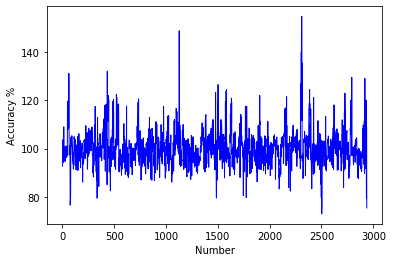

In [19]:
# Plot differences to visualise the differences from 100%
plt.plot(np.arange(m), diff, '-b', LineWidth=1)
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()

In [21]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred2 = lm2.predict(X_test)

# RMSE
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

# calculate our own accuracy where prediction within 10% is ok
diff2 = (y_pred2 / y_test * 100)
print('Mean of results: ',diff2.mean())
print('Deviation of results: ',diff2.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff2>=90, diff2<=110))[0]) / len(y_pred2) * 100)

RMSE:  4.116230575033885
Mean of results:  100.02064258621384
Deviation of results:  6.6683591418910515
Results within 10% support/resistance:  90.34013605442178
